# Heart Attack Analysis

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
from scipy.stats import skew, kurtosis
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

1. Age : Age of the patient
2. Sex : Sex of the patient
3. exng: exercise induced angina (1 = yes; 0 = no)
4. ca: number of major vessels (0-3)
5. cp : Chest Pain type chest pain type
    -Value 1: typical angina
    -Value 2: atypical angina
    -Value 3: non-anginal pain
    -Value 4: asymptomatic
6. trtbps : resting blood pressure (in mm Hg)
7. chol : cholestoral in mg/dl fetched via BMI sensor
8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
9. rest_ecg : resting electrocardiographic results
    -Value 0: normal
    -Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
10. thalach : maximum heart rate achieved

In [3]:
df = pd.read_csv("heart.csv")
df.rename({'caa':'ca','thalachh':'thalach'},axis=1, inplace=True) #rename column
df.head()

,age,sex,exng,ca,cp,trtbps,chol,fbs,restecg,thalach,oldpeak
0,63,1,0,0,3,145,233,1,0,150,2.3
1,37,1,0,0,2,130,250,0,1,187,3.5
2,41,0,0,0,1,130,204,0,0,172,1.4
3,56,1,0,0,1,120,236,0,1,178,0.8
4,57,0,1,0,0,120,354,0,1,163,0.6


In [4]:
# Review the dimensions of dataset.
df.shape

(303, 11)

In [5]:
# Review the data types of attributes in your data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   exng     303 non-null    int64  
 3   ca       303 non-null    int64  
 4   cp       303 non-null    int64  
 5   trtbps   303 non-null    int64  
 6   chol     303 non-null    int64  
 7   fbs      303 non-null    int64  
 8   restecg  303 non-null    int64  
 9   thalach  303 non-null    int64  
 10  oldpeak  303 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


In [6]:
# Summarize the distribution of instances across classes in your dataset.
df.describe()

,age,sex,exng,ca,cp,trtbps,chol,fbs,restecg,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.326733,0.729373,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604
std,9.082101,0.466011,0.469794,1.022606,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075
min,29.000000,0.000000,0.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000
25%,47.500000,0.000000,0.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000
50%,55.000000,1.000000,0.000000,0.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000
75%,61.000000,1.000000,1.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000
max,77.000000,1.000000,1.000000,4.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000


In [7]:
# Correlations Between Attributes
df.corr()

,age,sex,exng,ca,cp,trtbps,chol,fbs,restecg,thalach,oldpeak
age,1.000000,-0.098447,0.096801,0.276326,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.210013
sex,-0.098447,1.000000,0.141664,0.118261,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.096093
exng,0.096801,0.141664,1.000000,0.115739,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,0.288223
ca,0.276326,0.118261,0.115739,1.000000,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.222682
cp,-0.068653,-0.049353,-0.394280,-0.181053,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.149230
trtbps,0.279351,-0.056769,0.067616,0.101389,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.193216
chol,0.213678,-0.197912,0.067023,0.070511,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.053952
fbs,0.121308,0.045032,0.025665,0.137979,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.005747
restecg,-0.116211,-0.058196,-0.070733,-0.072042,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.058770
thalach,-0.398522,-0.044020,-0.378812,-0.213177,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.344187


# Central Tendency
It is measured using 3M's that is mean, median and mode.

1. Mean: It is defined as the average of the values present.
2. Median: It is the centrally located value of the dataset when arranged in ascending order.
3. Mode: It is the most frequent value in the dataset.
   Now the question arises how are these values useful in data analysis of data science. To answer it let us see the following graph.

Mean of age: 54.366336633663366
Median of age: 55.0
Mode of age: 0    58
dtype: int64
Skewness:  -0.2014596901125439


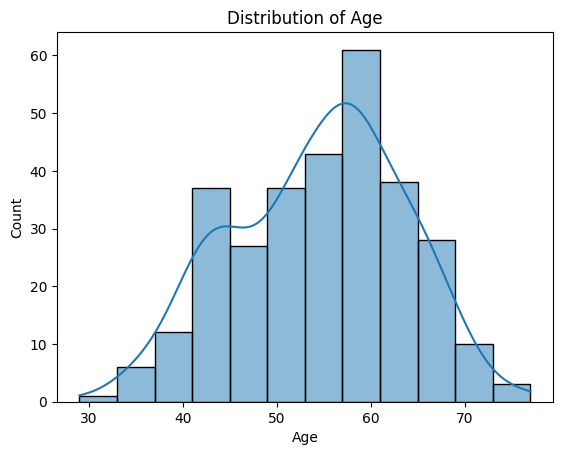

In [8]:
x = df["age"]
sns.histplot(x, kde = True)
plt.xlabel('Age')
plt.title('Distribution of Age')

print("Mean of age:", df["age"].mean())
print("Median of age:", df["age"].median())
print("Mode of age:", df["age"].mode())
print("Skewness: ", skew(df["age"]))

In [9]:
fig = ff.create_distplot([x], ['Age'], show_rug=False)
fig.update_layout(title = "Distribution of age")
fig.show()

From the graph above we have following observations:
1. The average value is around 54 years
2. The centrally located vale is median which is 55
3. The most frequent values is 58
    <p>Now we can see that the curve is not a perfect gaussian curve or bell shaped curve. The tail of the curve is towards left so it is a left skew curve (negative value above). So how does these values justify the curve shape? If we arrange our values for mean, median and mode we see that:
    <p>Mode > Median > Mean (shows left skewness)
    <p>Mode < Median < Mean (shows right skewness)
    <p>Mode = Median = Mean (perfect bell shape curve)
    <p>Hence these values provides the knowledge about the shape of the data distribution curve. Which makes it easier to deal with the data. Also, we see that mean is nearly equal to median which can tell us that there maybe no outliers present. Let us confirm it.

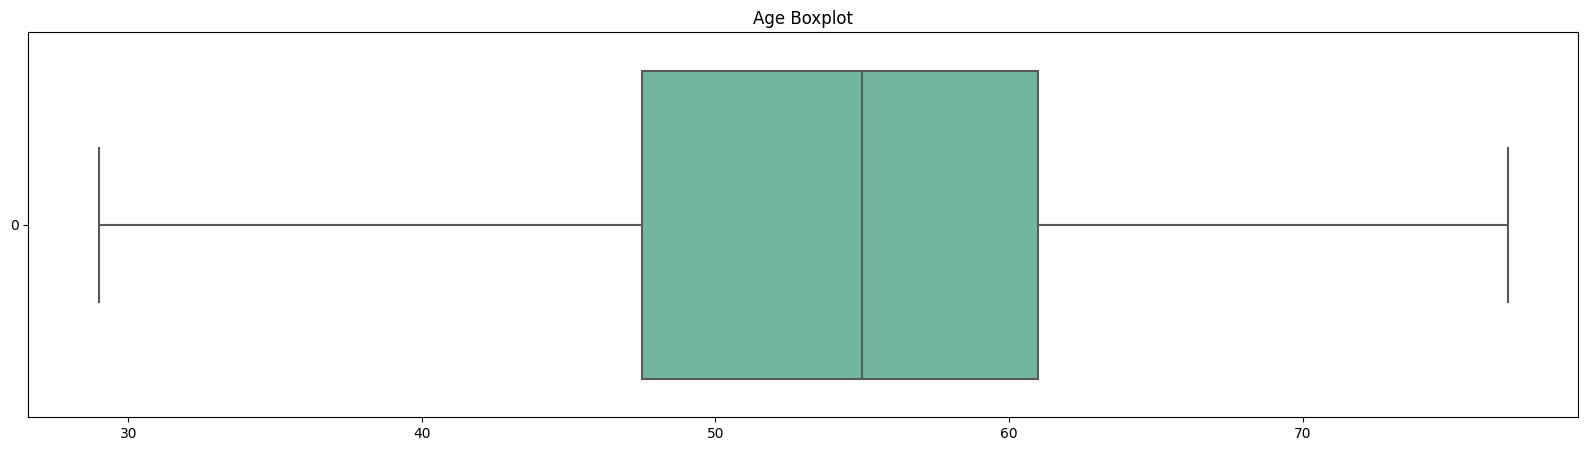

In [17]:
# plt.boxplot(df['age'], labels=['Age'])
ax = sns.boxplot(data=x, orient="h", palette="Set2")
plt.rcParams['figure.figsize']=(20,5)
plt.title('Age Boxplot')
plt.show()

In [13]:
# boxplot represent presence or absence of outliers
fig = px.box(df, x = "age", title = "distribution of age")
fig.show()

# Spread
It is a variability of the data. This spread is the distribution of the data around the central tendency. It can be measured using the following metrics:

1. Range
2. Quartile
3. Variance
4. Standard Deviation

Range: It can be measured as the difference between the largest and smallest values

In [18]:
range_chol = df["chol"].max() - df["chol"].min()
print("The range of the cholestrol level is:",range_chol)

The range of the cholestrol level is: 438


In [19]:
x = df["chol"]
hist_data = [x]
group_labels = ['cholestrol'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, show_rug=False)
fig.update_layout(title = "Distribution of cholestrol levels")
fig.show()

Here the values are concentrated between 200-300 but we see the range is 438. The reason is because of outliers in the data. <br>
The curve is right skewed curve. Here as a practice you can calculate the central tendency and see the above equation for right skew matches.



<b>Quartiles</b>: As a name suggest it represent quarter of the data and divides the data in 4 equal parts. Namely 25%(Q1), 50%(Q2), 75%(Q3). The data is arranged in ascending order which is the reason median and Q2 are equal.<br>
<b>IQR</b> is a range between Q1 and Q3. <br>
IQR is preferred over a range as it is not influence by outliers. IQR is used to measure variability by splitting a data set into four equal quartiles.<br>
Find Outlier = [(Q1 – 1.5 IQR), (Q3 + 1.5 IQR)]<br>
Any number not in range is outlier<br>
The quartiles and outliers can be explained with the help of box plot.<br>

In [20]:
fig = px.box(df, x = "chol", title = "Distribution of cholestrol levels")
fig.show()

In [21]:
df.chol.describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [22]:
# Outlier calculation
#IQR = Q3 - Q1
Q1 = 211.0
Q2 = 240.0
Q3 = 274.5
IQR = 274.5 - 211
outlier1 = (Q1 - 1.5 * IQR)
outlier2 = (Q3 + 1.5 * IQR)
print(f"The numbers outside the range of {outlier1} and {outlier2} will be considered as outliers")
print("The box plot verify our calculation. All the number greater than 369.75 are shown as outliers.")

The numbers outside the range of 115.75 and 369.75 will be considered as outliers
The box plot verify our calculation. All the number greater than 369.75 are shown as outliers.


<b>Variance:</b> It is a statistical parameter used to quantify spread. It measures how far each number in the set from the mean and thus from every other number in the set. Observation near to mean value gets the lower result and far from means gets higher value.<br>
<br>
1. A high variance indicates that the numbers are far from the mean and far from each other.<br>
2. A low variance indicates that the numbers are close to the mean and to each other.<br>
3. If variance is 0 that means that all the numbers in the dataset are the identical.<br>
4. The valid variance is always a positive number (0 or more).<br>
<b>Standard Deviation:</b> It is a square root of variance. It is more commonly used because the unit measure is easy to calculate spread.<br>
For example in variance the unit is kg2 whereas in standard deviation it is kg.<br>

In [23]:
# case of very high variance as per the plot above
print("Variance: ",df["chol"].var())
print("Standard Deviation: ", df["chol"].std())

Variance:  2686.42674797281
Standard Deviation:  51.83075098793003


# Normalization
In it values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling. When the curve does not follow the gaussian distribution it is good to do normalization.

In [24]:
df["normalized_chol"]=(df["chol"]-df["chol"].min())/(df["chol"].max()-df["chol"].min())

In [25]:
x = df["normalized_chol"]
hist_data = [x]
group_labels = ['normalized cholestrol'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, show_rug=False)
fig.update_layout(title = "Distribution of normalized cholestrol levels")
fig.show()

Compared to the above curve (Fig:1) we conclude following:

1. The spread is less now
2. The height of the curve is increased
3. All values as in range of 0 to 1

# PMF

Probability mass function (PMF) maps each value to its corresponding probability. PMF is plotted for discrete distributions.
However, when there are too many values in the sample, it becomes difficult to read and interpret the PMF plot. Because with the decrease in the probability of each values, the random noise increases.

In [26]:
chol_pmf = df["chol"].value_counts(normalize = True)
chol_pmf

204    0.019802
197    0.019802
234    0.019802
269    0.016502
254    0.016502
         ...   
284    0.003300
224    0.003300
167    0.003300
276    0.003300
131    0.003300
Name: chol, Length: 152, dtype: float64

In [27]:
fig = px.bar(x=chol_pmf.index, y =chol_pmf.values)
fig.update_layout(yaxis_title = "Normalized cholestrol values",
                 xaxis_title = "Index number",
                 title = "PMF distribution of the cholestrol values")
fig.show()

The above notebook shows the various parametrs for the descriptive analysis of the data. The ideas for the notebook is taken from the book "Think Stats: Probability and Statistics for Programmers by Allen B. Downey". While writing the notebook the help from various articles from Medium and Analytics Vidhya was also taken.
I hope you enjoy this notebook. Please share your thoughts in comments and upvote if you find the work useful.